In order to run the following codes you need to first download the cifar dataset using the following command line instructions.

```
# Get CIFAR10
wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
tar -xzvf cifar-10-python.tar.gz
rm cifar-10-python.tar.gz 
```

You should modify the loading code below to reference the folder created in the above steps. in the line:

```
X_trn, y_trn, X_te, y_te = load('cifar-10-batches-py')
```

make sure you reference the relative location of the cifar-10 folder.

In [1]:
import numpy as np
import os
import _pickle as pickle
import matplotlib.pyplot as plt

def load_CIFAR_batch(filename):
    ''' load single batch of cifar '''
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='latin1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
        Y = np.array(Y)
        return X, Y


def load(ROOT):
    ''' load all of cifar '''
    xs = []
    ys = []
    for b in range(1, 6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

def preprocess_CIFAR10(X_train, y_train, X_test, y_test):
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1)) # [49000, 3072]
    X_test = np.reshape(X_test, (X_test.shape[0], -1)) # [10000, 3072]
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_test -= mean_image
    
    return X_train, y_train, X_test, y_test

def visualize_sample(X_train, y_train, classes, samples_per_class=7):
    """visualize some samples in the training datasets """
    num_classes = len(classes)
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y) # get all the indexes of cls
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs): # plot the image one by one
            plt_idx = i * num_classes + y + 1 # i*num_classes and y+1 determine the row and column respectively
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()
    


In [2]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_trn, y_trn, X_te, y_te = load('cifar-10-batches-py')
X_train, y_train, X_test, y_test = preprocess_CIFAR10(X_trn, y_trn, X_te, y_te)
#X_train, X_test, y_train, y_test = preprocess_CIFAR10(X_trn, y_trn, X_te, y_te)
#X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, random_state=1)
model = LogisticRegression(solver = 'lbfgs')
X_train.shape, y_train.shape


((50000, 3072), (50000,))

In [3]:
model.fit(X_train, y_train)

# get test results
y_predicted = model.predict(X_test)

In [5]:
# classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# print confusion matrix
confusion = confusion_matrix(y_test, y_predicted)
print('Confusion matrix')
print(confusion)

Confusion matrix
[[480  55  28  25  22  22  24  55 203  86]
 [ 69 457  22  35  21  23  50  48  90 185]
 [128  65 212  76  95  78 145  95  67  39]
 [ 75  85  85 157  54 182 162  50  63  87]
 [ 68  44 116  65 240  73 188 123  31  52]
 [ 53  65  85 122  78 277 106  97  69  48]
 [ 31  48  75  98 100  66 457  49  34  42]
 [ 55  62  58  53  69  69  62 410  50 112]
 [147  80  11  27  10  21  25  19 541 119]
 [ 67 197  16  26  28  24  52  58 112 420]]


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

          0       0.41      0.48      0.44      1000
          1       0.39      0.46      0.42      1000
          2       0.30      0.21      0.25      1000
          3       0.23      0.16      0.19      1000
          4       0.33      0.24      0.28      1000
          5       0.33      0.28      0.30      1000
          6       0.36      0.46      0.40      1000
          7       0.41      0.41      0.41      1000
          8       0.43      0.54      0.48      1000
          9       0.35      0.42      0.38      1000

avg / total       0.35      0.37      0.36     10000



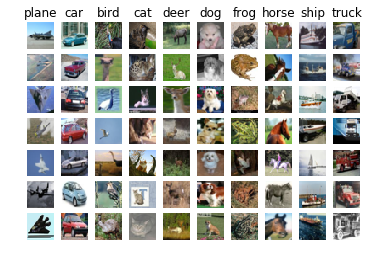

In [25]:
visualize_sample(X_trn, y_trn, classes)

In [30]:
X_trn.shape, y_trn.shape

((50000, 32, 32, 3), (50000,))